# Use Image Classification on the hand written digits data set (mnist)

In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


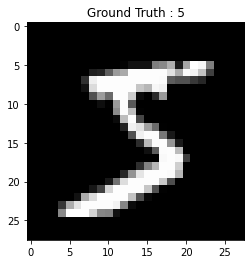

In [3]:
import matplotlib.pyplot as plt

#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

In [4]:
train_images.shape[1:]

(28, 28)

In [5]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


In [6]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [7]:
#scale data
train_data /=255.0
test_data /=255.0

In [8]:
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [9]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 1. Plot the loss and accuracy for both training data and validation data using the history object in the source code.

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 5s 17ms/step - loss: 0.2869 - accuracy: 0.9123 - val_loss: 0.1388 - val_accuracy: 0.9533
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0994 - accuracy: 0.9691 - val_loss: 0.0785 - val_accuracy: 0.9756
Epoch 3/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0626 - accuracy: 0.9807 - val_loss: 0.0713 - val_accuracy: 0.9766
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0442 - accuracy: 0.9855 - val_loss: 0.0979 - val_accuracy: 0.9711
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.0673 - val_accuracy: 0.9801
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0650 - val_accuracy: 0.9813
Epoch 7/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0658 - val_accuracy: 0.9809

In [11]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0744 - accuracy: 0.9819
Evaluation result on Test Data : Loss = 0.07440487295389175, accuracy = 0.9818999767303467


In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

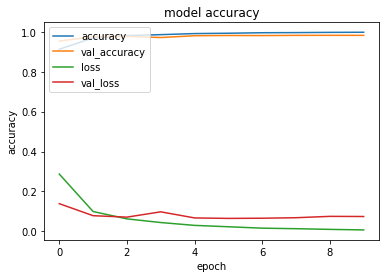

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

# 2. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.

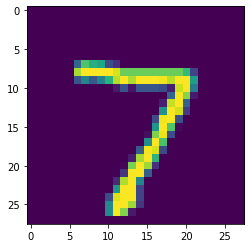

In [14]:
plt.imshow(test_data[0].reshape(28,28));

In [17]:
print("predicted label:",model.predict(test_data[0].reshape(1,784)))

1/1 [==============================] - 0s 83ms/step
predicted label: [[1.7450702e-11 1.5626347e-10 9.0478602e-10 1.1921726e-07 5.5921041e-14
  3.4721317e-13 1.2115700e-15 9.9999964e-01 2.0586902e-12 2.7695830e-07]]


# 3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.

In [18]:
#increasing the number of hidden layers to 4
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss1, test_acc1] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with 4 hidden layers: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))


Epoch 1/10
235/235 [==============================] - 9s 35ms/step - loss: 0.3540 - accuracy: 0.8885 - val_loss: 0.2443 - val_accuracy: 0.9265
Epoch 2/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1075 - accuracy: 0.9673 - val_loss: 0.1842 - val_accuracy: 0.9443
Epoch 3/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0674 - accuracy: 0.9792 - val_loss: 0.1315 - val_accuracy: 0.9622
Epoch 4/10
235/235 [==============================] - 8s 34ms/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.1110 - val_accuracy: 0.9669
Epoch 5/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.1143 - val_accuracy: 0.9688
Epoch 6/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0259 - accuracy: 0.9916 - val_loss: 0.0852 - val_accuracy: 0.9784
Epoch 7/10
235/235 [==============================] - 10s 42ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.1725 - val_accuracy: 0.956

In [19]:
#increasing the dense in hidden layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(612, activation='relu'))
model.add(Dense(712, activation='relu'))
model.add(Dense(812, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss2, test_acc2] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with increase in dense in hidden layers: Loss = {}, accuracy = {}".format(test_loss2, test_acc2))


Epoch 1/10
235/235 [==============================] - 12s 47ms/step - loss: 0.3537 - accuracy: 0.8866 - val_loss: 0.1845 - val_accuracy: 0.9452
Epoch 2/10
235/235 [==============================] - 10s 42ms/step - loss: 0.1043 - accuracy: 0.9687 - val_loss: 0.1200 - val_accuracy: 0.9630
Epoch 3/10
235/235 [==============================] - 11s 45ms/step - loss: 0.0665 - accuracy: 0.9799 - val_loss: 0.0991 - val_accuracy: 0.9710
Epoch 4/10
235/235 [==============================] - 11s 47ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0751 - val_accuracy: 0.9779
Epoch 5/10
235/235 [==============================] - 10s 43ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0830 - val_accuracy: 0.9762
Epoch 6/10
235/235 [==============================] - 9s 39ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0760 - val_accuracy: 0.9796
Epoch 7/10
235/235 [==============================] - 11s 46ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0710 - val_accuracy: 

In [21]:
#All hidden layers with tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(612, activation='tanh'))
model.add(Dense(712, activation='tanh'))
model.add(Dense(812, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss3, test_acc3] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with tanh activation: Loss = {}, accuracy = {}".format(test_loss3, test_acc3))

Epoch 1/10
235/235 [==============================] - 11s 43ms/step - loss: 0.5976 - accuracy: 0.8387 - val_loss: 0.3145 - val_accuracy: 0.8989
Epoch 2/10
235/235 [==============================] - 10s 45ms/step - loss: 0.2167 - accuracy: 0.9323 - val_loss: 0.2426 - val_accuracy: 0.9261
Epoch 3/10
235/235 [==============================] - 10s 43ms/step - loss: 0.1556 - accuracy: 0.9509 - val_loss: 0.3126 - val_accuracy: 0.9064
Epoch 4/10
235/235 [==============================] - 10s 44ms/step - loss: 0.1264 - accuracy: 0.9609 - val_loss: 0.1473 - val_accuracy: 0.9544
Epoch 5/10
235/235 [==============================] - 10s 44ms/step - loss: 0.1084 - accuracy: 0.9651 - val_loss: 0.2393 - val_accuracy: 0.9195
Epoch 6/10
235/235 [==============================] - 9s 40ms/step - loss: 0.0977 - accuracy: 0.9687 - val_loss: 0.1798 - val_accuracy: 0.9424
Epoch 7/10
235/235 [==============================] - 10s 42ms/step - loss: 0.0880 - accuracy: 0.9720 - val_loss: 0.1765 - val_accuracy: 

In [22]:
#All hidden layers with sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(612, activation='sigmoid'))
model.add(Dense(712, activation='sigmoid'))
model.add(Dense(812, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss4, test_acc4] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with sigmoid activation: Loss = {}, accuracy = {}".format(test_loss4, test_acc4))

Epoch 1/10
235/235 [==============================] - 11s 43ms/step - loss: 1.0092 - accuracy: 0.6530 - val_loss: 0.4195 - val_accuracy: 0.8709
Epoch 2/10
235/235 [==============================] - 10s 42ms/step - loss: 0.3233 - accuracy: 0.9012 - val_loss: 0.2781 - val_accuracy: 0.9092
Epoch 3/10
235/235 [==============================] - 10s 43ms/step - loss: 0.2285 - accuracy: 0.9300 - val_loss: 0.1991 - val_accuracy: 0.9365
Epoch 4/10
235/235 [==============================] - 9s 40ms/step - loss: 0.1905 - accuracy: 0.9413 - val_loss: 0.5257 - val_accuracy: 0.8392
Epoch 5/10
235/235 [==============================] - 10s 42ms/step - loss: 0.1644 - accuracy: 0.9494 - val_loss: 0.1717 - val_accuracy: 0.9483
Epoch 6/10
235/235 [==============================] - 10s 42ms/step - loss: 0.1516 - accuracy: 0.9528 - val_loss: 0.2163 - val_accuracy: 0.9355
Epoch 7/10
235/235 [==============================] - 10s 42ms/step - loss: 0.1390 - accuracy: 0.9572 - val_loss: 0.1455 - val_accuracy: 

In [23]:
print("Evaluation result on Test Data with 2 hidden layers: Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("Evaluation result on Test Data with 4 hidden layers: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))
print("Evaluation result on Test Data with increase in dense in hidden layers: Loss = {}, accuracy = {}".format(test_loss2, test_acc2))
print("Evaluation result on Test Data with tanh activation: Loss = {}, accuracy = {}".format(test_loss3, test_acc3))
print("Evaluation result on Test Data with sigmoid activation: Loss = {}, accuracy = {}".format(test_loss4, test_acc4))

Evaluation result on Test Data with 2 hidden layers: Loss = 0.07440487295389175, accuracy = 0.9818999767303467
Evaluation result on Test Data with 4 hidden layers: Loss = 0.09346473962068558, accuracy = 0.980400025844574
Evaluation result on Test Data with increase in dense in hidden layers: Loss = 0.08034028857946396, accuracy = 0.9814000129699707
Evaluation result on Test Data with tanh activation: Loss = 0.11245911568403244, accuracy = 0.9664000272750854
Evaluation result on Test Data with sigmoid activation: Loss = 0.13049034774303436, accuracy = 0.9595999717712402


# 4. Run the same code without scaling the images and check the performance?

In [24]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
# print(dimData) 
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss5, test_acc5] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data without scaling: Loss = {}, accuracy = {}".format(test_loss5, test_acc5))

(28, 28)
Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 5.9833 - accuracy: 0.8760 - val_loss: 0.7219 - val_accuracy: 0.9238
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.4283 - accuracy: 0.9434 - val_loss: 0.3116 - val_accuracy: 0.9529
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2436 - accuracy: 0.9584 - val_loss: 0.3553 - val_accuracy: 0.9397
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.2062 - accuracy: 0.9651 - val_loss: 0.5098 - val_accuracy: 0.9419
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1623 - accuracy: 0.9725 - val_loss: 0.3150 - val_accuracy: 0.9513
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1517 - accuracy: 0.9761 - val_loss: 0.2748 - val_accuracy: 0.9651
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1359 - accuracy: 0.9784 - val_loss: 0.2715 - val_accurac

In [25]:
print("Evaluation result on Test Data with 2 hidden layers: Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("Evaluation result on Test Data with 4 hidden layers: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))
print("Evaluation result on Test Data with increase in dense in hidden layers: Loss = {}, accuracy = {}".format(test_loss2, test_acc2))
print("Evaluation result on Test Data with tanh activation: Loss = {}, accuracy = {}".format(test_loss3, test_acc3))
print("Evaluation result on Test Data with sigmoid activation: Loss = {}, accuracy = {}".format(test_loss4, test_acc4))
print("Evaluation result on Test Data without scaling: Loss = {}, accuracy = {}".format(test_loss5, test_acc5))

Evaluation result on Test Data with 2 hidden layers: Loss = 0.07440487295389175, accuracy = 0.9818999767303467
Evaluation result on Test Data with 4 hidden layers: Loss = 0.09346473962068558, accuracy = 0.980400025844574
Evaluation result on Test Data with increase in dense in hidden layers: Loss = 0.08034028857946396, accuracy = 0.9814000129699707
Evaluation result on Test Data with tanh activation: Loss = 0.11245911568403244, accuracy = 0.9664000272750854
Evaluation result on Test Data with sigmoid activation: Loss = 0.13049034774303436, accuracy = 0.9595999717712402
Evaluation result on Test Data without scaling: Loss = 0.37273916602134705, accuracy = 0.9710999727249146
